# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [4]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [5]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [6]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [7]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [8]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

los datos muestran que en un promedio mas alto se rentan las bicicletas durante los dias habiles, no laborales que durante el fin de semana, sin embargo la diferencia de la media no es tan significativa entre estos grupos.
Las horas donde mas se rentan bicicletas corresponden a los horarios de 8 am, 5 y 6 pm lo cual puede suponer que corresponden a horarios de oficina.

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

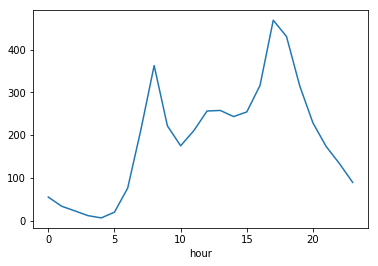

In [10]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

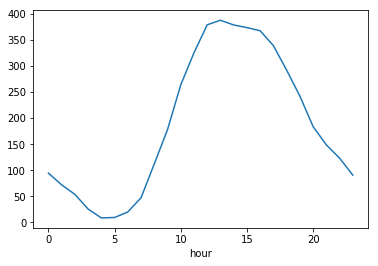

In [13]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

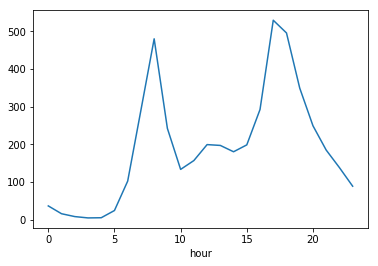

In [14]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

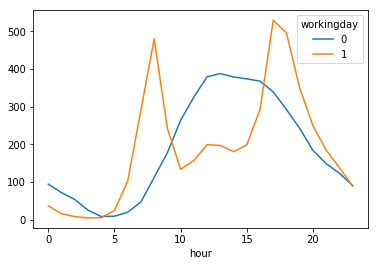

In [15]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

Se confirma la teoria anterior en los dias laborales la demananda aumenta en horarios de "oficina", para fines de semana se consentra entre las 11 y las 16 horas.

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [24]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [33]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
X=bikes[['workingday','hour']]
y=bikes['total']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficients: 
 [ 5.20940956 10.49362402]
Mean squared error: 28836.87


Los datos tomados no son suficientes para explicar el modelo, al no contemplar el resto de variables se supone una prediccion errada de los datos

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [71]:
bikes['prediction'] = bikes.total.mean()

In [72]:
hour = 8
bikes['pred'] = bikes.loc[bikes.hour<hour, 'total'].mean()
bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()

(((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5

153.86972728404965

In [73]:
bikes_izq = bikes.loc[bikes.hour<8].copy()

In [74]:
bikes_izq.hour.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [75]:
def error_hora(bikes, hour):
    bikes['pred'] = bikes.loc[bikes.hour<hour, 'total'].mean()
    bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

In [76]:
def error_workingday(bikes, workingday):
    bikes['pred'] = bikes.loc[bikes.workingday<workingday, 'total'].mean()
    bikes.loc[bikes.workingday>=workingday, 'pred'] = bikes.loc[bikes.workingday>=workingday, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

In [77]:
for hour in bikes_izq.hour.unique():
    print('Hora ',hour)
    error_hora(bikes_izq, hour)

Hora  0
90.40503144370732
Hora  1
90.40495967143089
Hora  2
90.18118273137108
Hora  3
89.30382537113742
Hora  4
87.11568382006938
Hora  5
82.33589171209294
Hora  6
73.97541213937505
Hora  7
67.59600121573682


In [78]:
bikes_izq.workingday.describe()

count    3594.000000
mean        0.678909
std         0.466961
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: workingday, dtype: float64

In [79]:
for workingday in [1, 0]:
    print('Dia de trabajo ',workingday)
    error_workingday(bikes_izq, workingday)

Dia de trabajo  1
89.89056176821326
Dia de trabajo  0
90.40503144370732


In [80]:
bikes_der = bikes.loc[bikes.hour>=8].copy()

for hour in bikes_der.hour.unique():
    print('Hora ',hour)
    error_hora(bikes_der, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Dia de trabajo ',workingday)
    error_workingday(bikes_der, workingday)

Hora  8
176.965398831481
Hora  9
174.91597595994776
Hora  10
176.5099013799444
Hora  11
176.94601620269356
Hora  12
176.721870492827
Hora  13
176.7384210016527
Hora  14
176.75182711705142
Hora  15
176.65947480193157
Hora  16
176.6315091259541
Hora  17
176.9271805142688
Hora  18
175.41594675786118
Hora  19
170.4346481459485
Hora  20
166.7843508707728
Hora  21
166.1935377429122
Hora  22
167.99524344379407
Hora  23
171.48731600968821
----------------------------------
Dia de trabajo  1
176.9536012177479
Dia de trabajo  0
176.965398831481


In [81]:
bikes_der_izq = bikes_der.loc[bikes_der.hour<21].copy()

for year in bikes_der_izq.hour.unique():
    print('Hora ',hour)
    error_hora(bikes_der_izq, hour)
print('----------------------------------')
for workingday in [1, 0]:
    print('Dia de trabajo ',workingday)
    error_workingday(bikes_der_izq, workingday)

Hora  23
180.4392695050326
Hora  23
180.4392695050326
Hora  23
180.4392695050326
Hora  23
180.4392695050326
Hora  23
180.4392695050326
Hora  23
180.4392695050326
Hora  23
180.4392695050326
Hora  23
180.4392695050326
Hora  23
180.4392695050326
Hora  23
180.4392695050326
Hora  23
180.4392695050326
Hora  23
180.4392695050326
Hora  23
180.4392695050326
----------------------------------
Dia de trabajo  1
180.38860207201742
Dia de trabajo  0
180.4392695050326


In [85]:
bikes_der_izq

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction,pred
datetime,,,,,,,,,,,,,,
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,191.574132,287.888082
2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,191.574132,287.888082
2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,10,191.574132,287.888082
2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,11,191.574132,287.888082
2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,12,191.574132,287.888082
2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,13,191.574132,287.888082
2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106,14,191.574132,287.888082
2011-01-01 15:00:00,1,0,0,2,18.04,21.970,77,19.9995,40,70,110,15,191.574132,287.888082
2011-01-01 16:00:00,1,0,0,2,17.22,21.210,82,19.9995,41,52,93,16,191.574132,287.888082


In [86]:
bikes_izq_izq = bikes_izq.loc[bikes_izq.hour<7].copy()
bikes_izq_izq

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction,pred
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,191.574132,55.437674
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,191.574132,55.437674
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,191.574132,55.437674
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,191.574132,55.437674
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,191.574132,55.437674
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,191.574132,55.437674
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,191.574132,55.437674
2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4,13,17,0,191.574132,55.437674
2011-01-02 01:00:00,1,0,0,2,18.04,21.970,94,16.9979,1,16,17,1,191.574132,55.437674


In [87]:
for hour in bikes_izq_izq.hour.unique():
    print('Hora', hour)
    error_hora(bikes_izq_izq, hour)
    
print('----------------------------------')
for workingday in [1, 0]:
    print('Dia de trabajo ',workingday)
    error_workingday(bikes_izq_izq, workingday)

Hora 0
39.56714516247788
Hora 1
38.46175887834954
Hora 2
38.827302356307555
Hora 3
39.34538405588436
Hora 4
39.534113157382144
Hora 5
38.30948200125475
Hora 6
35.24426946227024
----------------------------------
Dia de trabajo  1
39.18093811435608
Dia de trabajo  0
39.56714516247788


In [88]:
bikes_izq_der = bikes_izq.loc[bikes_izq.hour>=7].copy()
bikes_izq_der

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction,pred
datetime,,,,,,,,,,,,,,
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,191.574132,55.437674
2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1,1,7,191.574132,55.437674
2011-01-03 07:00:00,1,0,1,1,5.74,6.820,50,12.9980,1,63,64,7,191.574132,55.437674
2011-01-04 07:00:00,1,0,1,1,4.92,7.575,74,8.9981,2,92,94,7,191.574132,55.437674
2011-01-05 07:00:00,1,0,1,1,7.38,9.090,43,12.9980,1,87,88,7,191.574132,55.437674
2011-01-06 07:00:00,1,0,1,2,6.56,11.365,59,0.0000,0,95,95,7,191.574132,55.437674
2011-01-07 07:00:00,1,0,1,1,8.20,10.605,69,8.9981,8,76,84,7,191.574132,55.437674
2011-01-08 07:00:00,1,0,0,2,6.56,9.090,74,7.0015,1,8,9,7,191.574132,55.437674
2011-01-09 07:00:00,1,0,0,1,3.28,4.545,53,12.9980,1,5,6,7,191.574132,55.437674


In [89]:
bikes_der_der = bikes_der.loc[bikes_der.hour>=8].copy()
bikes_der_der

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction,pred
datetime,,,,,,,,,,,,,,
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,191.574132,258.671558
2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,191.574132,258.671558
2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,10,191.574132,258.671558
2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,11,191.574132,258.671558
2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,12,191.574132,258.671558
2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,13,191.574132,258.671558
2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106,14,191.574132,258.671558
2011-01-01 15:00:00,1,0,0,2,18.04,21.970,77,19.9995,40,70,110,15,191.574132,258.671558
2011-01-01 16:00:00,1,0,0,2,17.22,21.210,82,19.9995,41,52,93,16,191.574132,258.671558


In [90]:
bikes_izq_izq_izq = bikes_izq_izq.loc[bikes_izq_izq.workingday<1].copy()
bikes_izq_izq_izq

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction,pred
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,191.574132,32.582032
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,191.574132,32.582032
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,191.574132,32.582032
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,191.574132,32.582032
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,191.574132,32.582032
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,191.574132,32.582032
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,191.574132,32.582032
2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4,13,17,0,191.574132,32.582032
2011-01-02 01:00:00,1,0,0,2,18.04,21.970,94,16.9979,1,16,17,1,191.574132,32.582032


In [91]:
bikes_izq_izq_der = bikes_izq_izq.loc[bikes_izq_izq.workingday>=1].copy()
bikes_izq_izq_der

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction,pred
datetime,,,,,,,,,,,,,,
2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,0,191.574132,32.582032
2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,1,191.574132,32.582032
2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,4,191.574132,32.582032
2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,5,191.574132,32.582032
2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,6,191.574132,32.582032
2011-01-04 00:00:00,1,0,1,1,6.56,9.090,55,7.0015,0,5,5,0,191.574132,32.582032
2011-01-04 01:00:00,1,0,1,1,6.56,9.090,59,7.0015,0,2,2,1,191.574132,32.582032
2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1,1,2,191.574132,32.582032
2011-01-04 04:00:00,1,0,1,1,5.74,9.090,63,6.0032,0,2,2,4,191.574132,32.582032


In [92]:
for hour in bikes_izq_izq_der.hour.unique():
    print('Hora ',hour)
    error_hora(bikes_izq_izq_der, hour)

    
print('----------------------------------')
for workingday in [1, 0]:
    print('Dia de trabajo ',workingday)
    error_workingday(bikes_izq_izq_der, workingday)

Hora  0
38.65329098321401
Hora  1
38.513930163234264
Hora  4
36.08976094916708
Hora  5
31.587590064508074
Hora  6
23.803612375263405
Hora  2
38.62270734237614
Hora  3
37.959963780131886
----------------------------------
Dia de trabajo  1
38.65329098321401
Dia de trabajo  0
38.65329098321401


In [93]:
bikes_izq_izq_der_izq = bikes_izq_izq_der.loc[bikes_izq_izq_der.hour<6].copy()
bikes_izq_izq_der_izq

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction,pred
datetime,,,,,,,,,,,,,,
2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,0,191.574132,28.786385
2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,1,191.574132,28.786385
2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,4,191.574132,28.786385
2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,5,191.574132,28.786385
2011-01-04 00:00:00,1,0,1,1,6.56,9.090,55,7.0015,0,5,5,0,191.574132,28.786385
2011-01-04 01:00:00,1,0,1,1,6.56,9.090,59,7.0015,0,2,2,1,191.574132,28.786385
2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1,1,2,191.574132,28.786385
2011-01-04 04:00:00,1,0,1,1,5.74,9.090,63,6.0032,0,2,2,4,191.574132,28.786385
2011-01-04 05:00:00,1,0,1,1,4.92,7.575,68,7.0015,0,4,4,5,191.574132,28.786385


In [94]:
bikes_izq_izq_der_der = bikes_izq_izq_der.loc[bikes_izq_izq_der.hour>=6].copy()
bikes_izq_izq_der_der

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction,pred
datetime,,,,,,,,,,,,,,
2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,6,191.574132,28.786385
2011-01-04 06:00:00,1,0,1,1,4.92,7.575,74,7.0015,0,36,36,6,191.574132,28.786385
2011-01-05 06:00:00,1,0,1,1,8.20,9.850,47,15.0013,0,33,33,6,191.574132,28.786385
2011-01-06 06:00:00,1,0,1,2,5.74,8.335,63,7.0015,0,36,36,6,191.574132,28.786385
2011-01-07 06:00:00,1,0,1,2,8.20,12.880,69,0.0000,8,26,34,6,191.574132,28.786385
2011-01-10 06:00:00,1,0,1,1,4.92,6.060,50,19.0012,0,31,31,6,191.574132,28.786385
2011-01-11 06:00:00,1,0,1,2,6.56,9.090,55,8.9981,0,27,27,6,191.574132,28.786385
2011-01-12 06:00:00,1,0,1,1,4.92,7.575,93,8.9981,0,16,16,6,191.574132,28.786385
2011-01-13 06:00:00,1,0,1,1,4.92,7.575,54,8.9981,0,28,28,6,191.574132,28.786385


In [95]:
for hour in bikes_izq_izq_der_der.hour.unique():
    print('Hora ',hour)
    error_hora(bikes_izq_izq_der_der, hour)

print('----------------------------------')
for workingday in [1, 0]:
    print('Dia de trabajo ',workingday)
    error_workingday(bikes_izq_izq_der_der, workingday)

Hora  6
45.40554328583909
----------------------------------
Dia de trabajo  1
45.40554328583909
Dia de trabajo  0
45.40554328583909


In [96]:
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(bikes.total, bikes.prediction))

181.1361335742659

In [97]:
def workingday_split(workingday):
    lower_workingday_total = bikes[bikes.workingday < workingday].total.mean()
    higher_workingday_total = bikes[bikes.workingday >= workingday].total.mean()
    bikes['prediction'] = np.where(bikes.workingday < workingday, lower_workingday_total, higher_workingday_total)
    return np.sqrt(metrics.mean_squared_error(bikes.total, bikes.prediction))

In [99]:
print('RMSE:', workingday_split(0))
bikes

RMSE: 181.1361335742659


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction,pred
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,191.574132,55.437674
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,191.574132,55.437674
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,191.574132,55.437674
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,191.574132,55.437674
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,191.574132,55.437674
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,191.574132,55.437674
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,191.574132,55.437674
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,191.574132,55.437674
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,191.574132,258.671558


In [100]:
print('RMSE:', workingday_split(1))
bikes

RMSE: 181.12395921110559


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,prediction,pred
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,188.506621,55.437674
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,188.506621,55.437674
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,188.506621,55.437674
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,188.506621,55.437674
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,188.506621,55.437674
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,188.506621,55.437674
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,188.506621,55.437674
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,188.506621,55.437674
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,188.506621,258.671558


In [101]:
workingday_range = range(bikes.workingday.min(), bikes.workingday.max(), 2)
RMSE = [workingday_split(workingday) for workingday in workingday_range]

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'RMSE (lower is better)')

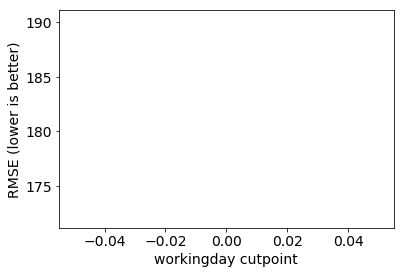

In [103]:
plt.plot(workingday_range, RMSE)
plt.xlabel('workingday cutpoint')
plt.ylabel('RMSE (lower is better)')

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [112]:
feature_cols = ['hour', 'workingday', 'season', 'humidity']
X = bikes[feature_cols]
y = bikes.total

In [113]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [114]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

118.50668116345625

In [115]:
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

149.27606558022308

In [116]:
# list of values to try
max_depth_range = range(1, 23)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

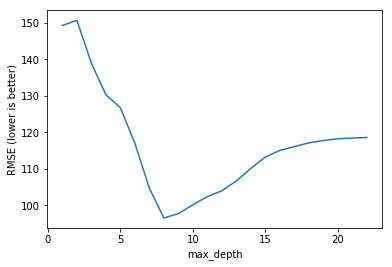

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [118]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [120]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,hour,0.836831
1,workingday,0.004044
2,season,0.159125
3,humidity,0.000000


In [122]:
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_bikes.png', feature_names=feature_cols)


el  arbol de decision por scikit learn, permite de ejecutar de una forma mas rapida, precisa y con mayor cantidad de variables